# Import Necessary Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Reading the Data

In [2]:
dftest = pd.read_csv('/kaggle/input/bank-term-deposit-predictions/test.csv')
df= pd.read_csv('/kaggle/input/bank-term-deposit-predictions/train.csv') # Data frame Train file

**This dataset, titled Direct Marketing Campaigns for Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.**

**The dataset contains various features that provide insights into customer attributes and campaign outcomes. These features include:**

**Age: The age of the customer.**

**Job: The occupation of the customer.**

**Marital Status: The marital status of the customer.**

**Education: The education level of the customer.**

**Default: Whether or not the customer has credit in default.**

**Balance: The balance of the customer's account.**

**Housing Loan: Whether or not the customer has a housing loan.**

**Contact Communication Type: The method used to contact the customer (e.g., telephone, cellular).**

**Day: The day of the month when the last contact with the customers was made.**

**Duration: The duration (in seconds) of the last contact with customers during a campaign.**

**Campaign Contacts Count: Number of contacts performed during this campaign for each customer**

**-pdays : number days passed since previously contacted form previous camapign**

**-poutcome : outcome from previous marketing campaign**

**The purpose behind this dataset is to train a predictive model that can determine if a given customer will subscribe to a term deposit based on these various features. By analyzing historical data on successful and unsuccessful subscription outcomes, patterns can be identified which help predict future subscription behavior.**

**In addition to training data, there is also test data included in this dataset. This test data can be used to evaluate how well our trained predictive model performs when applied to new, unseen instances.**

**By utilizing this dataset and applying machine learning techniques, businesses in similar domains can better understand their target audience and optimize their marketing efforts towards potential subscribers who are more likely to respond positively to these campaigns******

# Explore the Data

In [3]:
df.shape

(45211, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**No missing Value**

In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.duplicated().sum()

0

**No Duplicated value also**

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<h2>The Data are Clean<h2>

# Analysis and Visualization

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
job = df['job'].value_counts().reset_index()
job

,job,count
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154
5,retired,2264
6,self-employed,1579
7,entrepreneur,1487
8,unemployed,1303
9,housemaid,1240


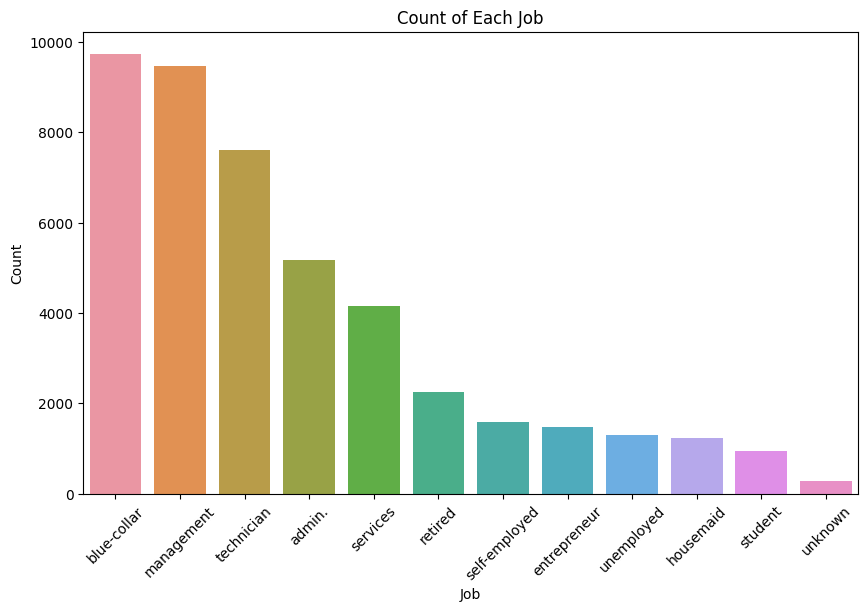

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='job', y='count', data=job)
plt.title('Count of Each Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**This Graph show the number of Customer in every job**

In [13]:
marital = df['marital'].value_counts().reset_index()
marital

,marital,count
0,married,27214
1,single,12790
2,divorced,5207


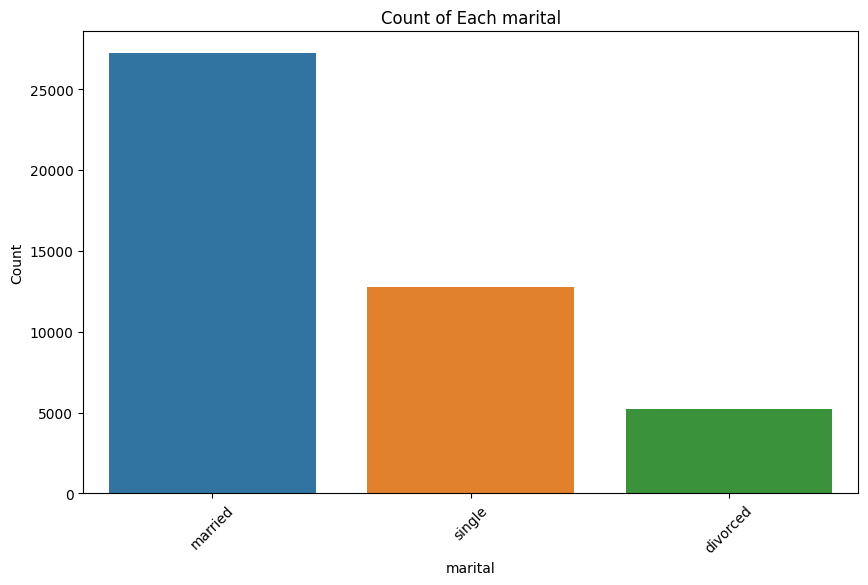

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='count', data=marital)
plt.title('Count of Each marital')
plt.xlabel('marital')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**This Graph show the number of marital**

In [15]:
education = df['education'].value_counts().reset_index()
education

,education,count
0,secondary,23202
1,tertiary,13301
2,primary,6851
3,unknown,1857


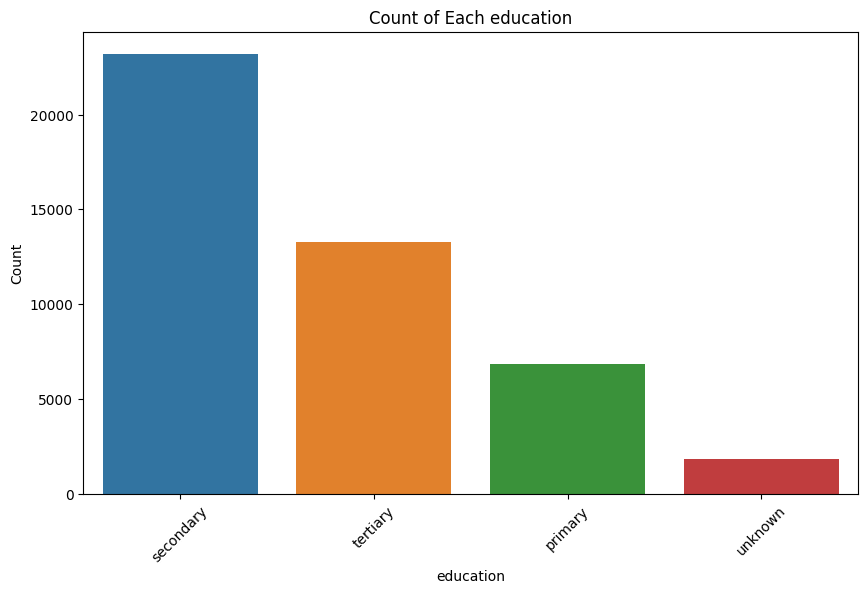

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='count', data=education)
plt.title('Count of Each education')
plt.xlabel('education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**This Graph show the number of Customer in every education**

In [17]:
default = df['default'].value_counts().reset_index()
default

,default,count
0,no,44396
1,yes,815


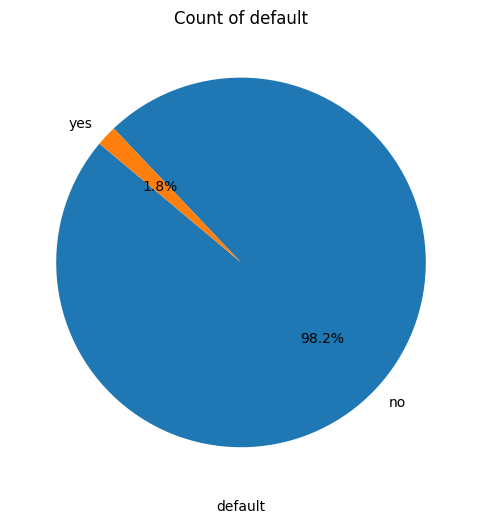

In [18]:
plt.figure(figsize=(10, 6))
plt.pie(default['count'],labels=default['default'],autopct='%1.1f%%', startangle=140)
plt.title('Count of default')
plt.xlabel('default')
plt.xticks(rotation=45)
plt.show()

**The meanning of default is**
**Default: Whether or not the customer has credit in default.**

In [19]:
list1 = ['housing','loan']
list1

['housing', 'loan']

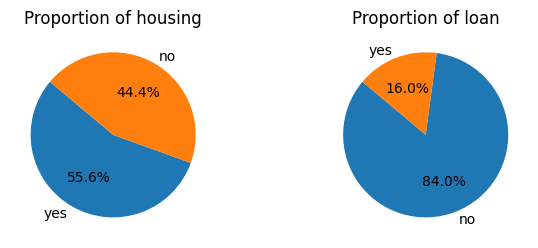

In [20]:
for i, variable in enumerate(list1, start=1):
    plt.subplot(2, 2, i)
    df[variable].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title('Proportion of ' + variable)
    plt.ylabel('')

plt.tight_layout()  
plt.show()

**Housing Loan: Whether or not the customer has a housing loan.**

In [21]:
list2 = ['poutcome','contact']
list2

['poutcome', 'contact']

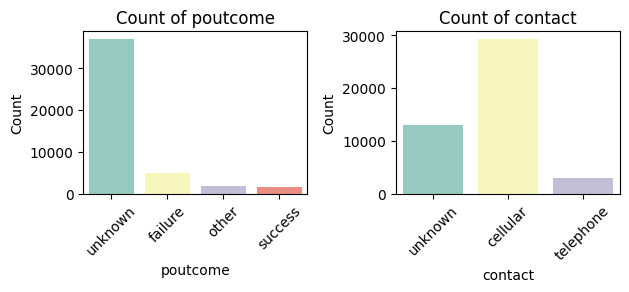

In [22]:
for i, variable in enumerate(list2, start=1):
    plt.subplot(2, 2, i)
    sns.countplot(x=variable, data=df, palette="Set3")
    plt.title('Count of ' + variable)
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

**Contact Communication Type: The method used to contact the customer (e.g., telephone, cellular).**

**-poutcome : outcome from previous marketing campaign**

<Axes: xlabel='month'>

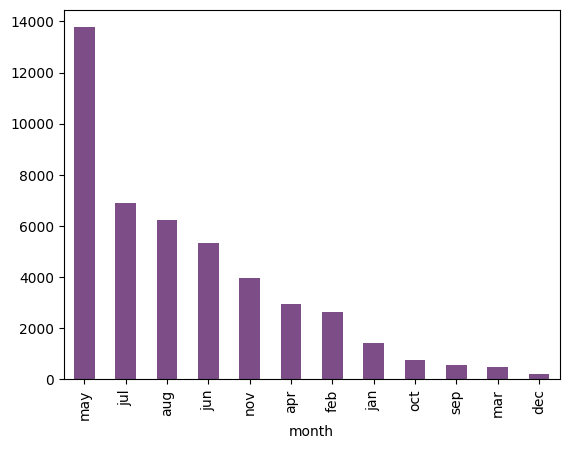

In [23]:
df['month'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

In [24]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [25]:
histogram_labels = ['age',
                    'balance', 
                    'day', 
                    'duration'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

# Prepocessing the Data

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**The Target Column is Y**

In [27]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [28]:
df.drop(columns = ['default','poutcome','previous','pdays'],inplace=True)

In [29]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,cellular,17,nov,977,3,yes
45207,71,retired,divorced,primary,1729,no,no,cellular,17,nov,456,2,yes
45208,72,retired,married,secondary,5715,no,no,cellular,17,nov,1127,5,yes
45209,57,blue-collar,married,secondary,668,no,no,telephone,17,nov,508,4,no


In [30]:
label_encoder = LabelEncoder()
df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['month'] = label_encoder.fit_transform(df['month'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['y'] = label_encoder.fit_transform(df['y'])

In [31]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,29,1,0,2,5,8,151,1,0
2,33,2,1,1,2,1,1,2,5,8,76,1,0
3,47,1,1,3,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,1,0,0,2,5,8,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,825,0,0,0,17,9,977,3,1
45207,71,5,0,0,1729,0,0,0,17,9,456,2,1
45208,72,5,1,1,5715,0,0,0,17,9,1127,5,1
45209,57,1,1,1,668,0,0,1,17,9,508,4,0


# Train_Test_Split

In [32]:
X = df.drop(columns='y',axis=1)
Y = df['y']

In [33]:
X

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign
0,58,4,1,2,2143,1,0,2,5,8,261,1
1,44,9,2,1,29,1,0,2,5,8,151,1
2,33,2,1,1,2,1,1,2,5,8,76,1
3,47,1,1,3,1506,1,0,2,5,8,92,1
4,33,11,2,3,1,0,0,2,5,8,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,825,0,0,0,17,9,977,3
45207,71,5,0,0,1729,0,0,0,17,9,456,2
45208,72,5,1,1,5715,0,0,0,17,9,1127,5
45209,57,1,1,1,668,0,0,1,17,9,508,4


In [34]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [35]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [36]:
X_train

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign
1163,32,0,2,1,89,1,1,2,8,8,308,3
3020,50,1,1,1,606,1,0,2,14,8,673,2
1234,31,6,1,2,322,1,0,2,8,8,159,1
5445,30,7,1,1,-108,1,0,2,23,8,216,1
43964,32,4,1,2,913,1,0,0,23,6,883,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25233,39,4,1,1,517,1,0,0,18,9,387,3
18448,53,1,1,0,252,0,0,0,31,5,727,4
40753,59,5,1,2,1425,0,0,0,10,1,489,2
19776,34,4,1,2,38,0,0,0,8,1,52,11


In [37]:
Y_train

1163     0
3020     0
1234     0
5445     0
43964    0
        ..
25233    0
18448    1
40753    0
19776    0
14148    0
Name: y, Length: 36168, dtype: int64

In [38]:
x_test

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign
15859,41,7,1,1,6687,1,0,0,21,5,91,3
1499,34,7,1,1,-315,1,0,2,8,8,56,2
44250,24,8,2,1,1234,0,0,0,21,5,314,1
39171,23,8,2,1,234,1,0,0,18,8,33,5
12613,26,0,1,1,-401,1,1,2,4,5,246,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41113,45,9,0,1,982,1,0,0,17,1,123,2
25781,48,1,1,1,-202,1,1,0,19,9,565,1
5400,54,9,1,1,7252,0,0,2,23,8,139,2
35043,33,4,1,2,5289,1,0,0,6,8,487,2


In [39]:
y_test

15859    0
1499     0
44250    1
39171    0
12613    0
        ..
41113    0
25781    0
5400     0
35043    0
12023    0
Name: y, Length: 9043, dtype: int64

# Building Model

<h2>DecisionTreeClassifier<h2>

In [40]:
dectree = DecisionTreeClassifier()

In [41]:
dectree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [42]:
dectree.score(X_train,Y_train)

1.0

In [43]:
dectree.score(x_test,y_test)

0.8697334955213978

In [44]:
y_pred = dectree.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7982
           1       0.45      0.48      0.46      1061

    accuracy                           0.87      9043
   macro avg       0.69      0.70      0.69      9043
weighted avg       0.87      0.87      0.87      9043



<h2>RandomForestClassifier<h2>

In [46]:
randforest = RandomForestClassifier(n_estimators=100)

In [47]:
randforest.fit(X_train, Y_train)

RandomForestClassifier()

In [48]:
randforest.score(X_train, Y_train)

0.9999723512497235

In [49]:
randforest.score(x_test, y_test)

0.9002543403737697

In [50]:
y_pred = randforest.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7982
           1       0.62      0.38      0.47      1061

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



<h2>LogisticRegression<h2>

In [52]:
logreg = LogisticRegression()

In [53]:
logreg.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [54]:
logreg.score(X_train,Y_train)

0.888326697633267

In [55]:
logreg.score(x_test,y_test)

0.8885325666261197

In [56]:
y_pred = randforest.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7982
           1       0.62      0.38      0.47      1061

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043

